In [6]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '71984ca3-e5fd-4fa4-add4-1448902134b1',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-12-09T20:17:01.020Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 8964}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9873, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [7]:
type(data)

dict

In [20]:
import pandas as pd

# This allow you to see all the columns, not just like 15
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)

In [21]:
# This normalize the data and make it all pretty in all dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\ROG\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9873,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.922920e+07,1.922920e+07,NaN,1,NaN,NaN,None,2022-12-09T20:15:00.000Z,17152.324030,2.086462e+10,6.2247,0.040187,-0.607229,0.915401,2.152131,-10.839993,-20.419951,3.298255e+11,38.5936,3.601988e+11,None,2022-12-09T20:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-09 22:00:33.657180
1,1027,Ethereum,ETH,ethereum,6268,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2022-12-09T20:15:00.000Z,1269.008854,5.763717e+09,-5.0310,0.110437,-1.146590,-1.418227,6.733702,-3.041999,-27.056471,1.552935e+11,18.1715,1.552935e+11,None,2022-12-09T20:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-09 22:00:33.657180
2,825,Tether,USDT,tether,44419,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.570769e+10,7.314177e+10,NaN,3,NaN,NaN,None,2022-12-09T20:15:00.000Z,1.000067,2.547111e+10,2.0121,0.000394,-0.006218,0.000673,0.092606,0.006501,-0.016278,6.571213e+10,7.6892,7.314670e+10,None,2022-12-09T20:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-12-09 22:00:33.657180
3,1839,BNB,BNB,bnb,1150,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.599687e+08,1.599800e+08,NaN,4,NaN,NaN,None,2022-12-09T20:15:00.000Z,287.820440,6.216393e+08,4.8556,0.210220,-0.843816,-1.021379,3.245398,4.716207,-2.206521,4.604227e+10,5.3875,5.756409e+10,None,2022-12-09T20:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-09 22:00:33.657180
4,3408,USD Coin,USDC,usd-coin,8847,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.284966e+10,4.284966e+10,NaN,5,NaN,NaN,None,2022-12-09T20:14:00.000Z,1.000006,2.159500e+09,-0.9004,-0.006997,-0.016181,-0.002918,-0.007203,-0.005999,0.008179,4.284994e+10,5.0140,4.284994e+10,None,2022-12-09T20:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-12-09 22:00:33.657180
5,4687,Binance USD,BUSD,binance-usd,5726,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.209998e+10,2.209998e+10,NaN,6,NaN,NaN,None,2022-12-09T20:14:00.000Z,1.000131,5.829871e+09,6.0645,0.018814,0.012017,-0.007046,-0.080934,0.030862,0.011477,2.210288e+10,2.5863,2.210288e+10,None,2022-12-09T20:14:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-12-09 22:00:33.657180
6,52,XRP,XRP,xrp,858,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.039546e+10,9.998919e+10,NaN,7,NaN,NaN,None,2022-12-09T20:15:00.000Z,0.387260,7.258472e+08,-3.0634,-0.058218,-1.353401,-0.963944,9.164308,-25.821817,8.447027,1.951613e+10,2.2837,3.872597e+10,None,2022-12-09T20:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-09 22:00:33.657180
7,74,Dogecoin,DOGE,dogecoin,610,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,8,NaN,NaN,None,2022-12-09T20:15:00.000Z,0.096700,4.312669e+08,-9.1058,0.297730,-1.716156,-2.692392,17.418234,59.528308,50.770317,1.282922e+10,1.5011,1.282922e+10,None,2022-12-09T20:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-09 22:00:33.657180
8,2010,Cardano,ADA,cardano,605,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.446375e+10,3.523064e+10,NaN,9,NaN,NaN,None,202

In [22]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '71984ca3-e5fd-4fa4-add4-1448902134b1',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
   
# Note:
# I had to go in and put "jupyter notebook --Notebookapp.iopub_data_rate_limit=1e10"
# Into the Anaconda prompt to change this to allow to pull data    
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])
# Use this if you want to create a csv and append data to it  
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df
    
    #if not os.path.isfile(r'G:\DATA ANALITYCS\Portfolio Project\crypto\Pyhton Script\API.csv'):
    #    df.to_csv(r'G:\DATA ANALITYCS\Portfolio Project\crypto\Pyhton Script\API.csv', header='column_names')
    #else:
    #    df.to_csv(r'G:\DATA ANALITYCS\Portfolio Project\crypto\Pyhton Script\API.csv', mode='a', header=False)
    
# if that didn't work, try using local host URL

In [23]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API runner completed")
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2022-12-09T22:00:51.247Z', 'error_code': 0, 'error_message': None, 'elapsed': 27, 'credit_count': 1, 'notice': None, 'total_count': 8964}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9873, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

C:\Users\ROG\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2022-12-09T22:01:52.548Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': None, 'total_count': 8964}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9873, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

C:\Users\ROG\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2022-12-09T22:02:53.863Z', 'error_code': 0, 'error_message': None, 'elapsed': 39, 'credit_count': 1, 'notice': None, 'total_count': 8964}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9873, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

C:\Users\ROG\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2022-12-09T22:03:55.180Z', 'error_code': 0, 'error_message': None, 'elapsed': 34, 'credit_count': 1, 'notice': None, 'total_count': 8964}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9873, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

C:\Users\ROG\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2022-12-09T22:04:56.473Z', 'error_code': 0, 'error_message': None, 'elapsed': 30, 'credit_count': 1, 'notice': None, 'total_count': 8964}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9873, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

C:\Users\ROG\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2022-12-09T22:05:57.801Z', 'error_code': 0, 'error_message': None, 'elapsed': 31, 'credit_count': 1, 'notice': None, 'total_count': 8964}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9873, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

C:\Users\ROG\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2022-12-09T22:06:59.166Z', 'error_code': 0, 'error_message': None, 'elapsed': 37, 'credit_count': 1, 'notice': None, 'total_count': 8964}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9873, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

C:\Users\ROG\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2022-12-09T22:08:00.454Z', 'error_code': 0, 'error_message': None, 'elapsed': 14, 'credit_count': 1, 'notice': None, 'total_count': 8964}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9873, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

C:\Users\ROG\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2022-12-09T22:09:01.861Z', 'error_code': 0, 'error_message': None, 'elapsed': 39, 'credit_count': 1, 'notice': None, 'total_count': 8964}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9873, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

C:\Users\ROG\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2022-12-09T22:10:03.094Z', 'error_code': 0, 'error_message': None, 'elapsed': 25, 'credit_count': 1, 'notice': None, 'total_count': 8964}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9873, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

C:\Users\ROG\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2022-12-09T22:11:04.459Z', 'error_code': 0, 'error_message': None, 'elapsed': 80, 'credit_count': 1, 'notice': None, 'total_count': 8964}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9873, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

C:\Users\ROG\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2022-12-09T22:12:05.835Z', 'error_code': 0, 'error_message': None, 'elapsed': 37, 'credit_count': 1, 'notice': None, 'total_count': 8964}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9873, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

C:\Users\ROG\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2022-12-09T22:13:07.194Z', 'error_code': 0, 'error_message': None, 'elapsed': 29, 'credit_count': 1, 'notice': None, 'total_count': 8964}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9873, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

C:\Users\ROG\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


KeyboardInterrupt: 

In [26]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9873,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.922920e+07,1.922920e+07,NaN,1,NaN,NaN,None,2022-12-09T20:15:00.000Z,17152.324030,2.086462e+10,6.2247,0.040187,-0.607229,0.915401,2.152131,-10.839993,-20.419951,3.298255e+11,38.5936,3.601988e+11,None,2022-12-09T20:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-09 22:00:33.657180
1,1027,Ethereum,ETH,ethereum,6268,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2022-12-09T20:15:00.000Z,1269.008854,5.763717e+09,-5.0310,0.110437,-1.146590,-1.418227,6.733702,-3.041999,-27.056471,1.552935e+11,18.1715,1.552935e+11,None,2022-12-09T20:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-09 22:00:33.657180
2,825,Tether,USDT,tether,44419,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.570769e+10,7.314177e+10,NaN,3,NaN,NaN,None,2022-12-09T20:15:00.000Z,1.000067,2.547111e+10,2.0121,0.000394,-0.006218,0.000673,0.092606,0.006501,-0.016278,6.571213e+10,7.6892,7.314670e+10,None,2022-12-09T20:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-12-09 22:00:33.657180
3,1839,BNB,BNB,bnb,1150,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.0,1.599687e+08,1.599800e+08,NaN,4,NaN,NaN,None,2022-12-09T20:15:00.000Z,287.820440,6.216393e+08,4.8556,0.210220,-0.843816,-1.021379,3.245398,4.716207,-2.206521,4.604227e+10,5.3875,5.756409e+10,None,2022-12-09T20:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-09 22:00:33.657180
4,3408,USD Coin,USDC,usd-coin,8847,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.284966e+10,4.284966e+10,NaN,5,NaN,NaN,None,2022-12-09T20:14:00.000Z,1.000006,2.159500e+09,-0.9004,-0.006997,-0.016181,-0.002918,-0.007203,-0.005999,0.008179,4.284994e+10,5.0140,4.284994e+10,None,2022-12-09T20:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-12-09 22:00:33.657180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,6636,Polkadot,DOT,polkadot-new,435,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1.145337e+09,1.261360e+09,NaN,11,9.048698e+08,4.776583e+09,None,2022-12-09T22:11:00.000Z,5.278752,1.451182e+08,-15.0324,-0.108184,-2.483074,-6.286044,-2.483265,-16.113251,-31.937681,6.045948e+09,0.7091,6.658408e+09,None,2022-12-09T22:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-09 22:13:07.273749
11,4943,Dai,DAI,multi-collateral-dai,1718,2019-11-22T00:00:00.000Z,"[defi, stablecoin, asset-backed-stablecoin, et...",NaN,5.873469e+09,5.873469e+09,NaN,12,NaN,NaN,None,2022-12-09T22:11:00.000Z,0.999840,1.100195e+08,-33.7322,0.014191,-0.022497,-0.008858,0.326584,0.059458,-0.010899,5.872530e+09,0.6888,5.872530e+09,None,2022-12-09T22:11:00.000Z,1027.0,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2022-12-09 22:13:07.273749
12,2,Litecoin,LTC,litecoin,856,2013-04-28T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange]",84000000.0,7.179426e+07,8.400000e+07,NaN,13,NaN,NaN,None,2022-12-09T22:11:00.000Z,76.292080,4.554108e+08,-23.5787,0.022991,-1.839990,-1.318075,54.411062,44.246784,19.296385,5.477333e+09,0.6426,6.408535e+09,None,2022-12-09T22

In [28]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [29]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9873,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19229200.00000,19229200.00000,NaN,1,NaN,NaN,None,2022-12-09T20:15:00.000Z,17152.32403,20864619832.95582,6.22470,0.04019,-0.60723,0.91540,2.15213,-10.83999,-20.41995,329825469244.46149,38.59360,360198804637.40997,None,2022-12-09T20:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-09 22:00:33.657180
1,1027,Ethereum,ETH,ethereum,6268,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2022-12-09T20:15:00.000Z,1269.00885,5763717025.30465,-5.03100,0.11044,-1.14659,-1.41823,6.73370,-3.04200,-27.05647,155293519782.77979,18.17150,155293519782.78000,None,2022-12-09T20:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-09 22:00:33.657180
2,825,Tether,USDT,tether,44419,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65707694611.09682,73141766321.23428,NaN,3,NaN,NaN,None,2022-12-09T20:15:00.000Z,1.00007,25471106126.35750,2.01210,0.00039,-0.00622,0.00067,0.09261,0.00650,-0.01628,65712127323.84138,7.68920,73146700544.56000,None,2022-12-09T20:15:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-12-09 22:00:33.657180
3,1839,BNB,BNB,bnb,1150,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,159968719.10473,159979963.59043,NaN,4,NaN,NaN,None,2022-12-09T20:15:00.000Z,287.82044,621639303.86038,4.85560,0.21022,-0.84382,-1.02138,3.24540,4.71621,-2.20652,46042267095.97209,5.38750,57564087971.26000,None,2022-12-09T20:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-09 22:00:33.657180
4,3408,USD Coin,USDC,usd-coin,8847,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,42849664510.67589,42849664510.67589,NaN,5,NaN,NaN,None,2022-12-09T20:14:00.000Z,1.00001,2159499899.40894,-0.90040,-0.00700,-0.01618,-0.00292,-0.00720,-0.00600,0.00818,42849939223.18846,5.01400,42849939223.19000,None,2022-12-09T20:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-12-09 22:00:33.657180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,6636,Polkadot,DOT,polkadot-new,435,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1145336551.38301,1261360221.68819,NaN,11,904869778.00000,4776583229.01448,None,2022-12-09T22:11:00.000Z,5.27875,145118185.40969,-15.03240,-0.10818,-2.48307,-6.28604,-2.48327,-16.11325,-31.93768,6045947710.84660,0.70910,6658407902.60000,None,2022-12-09T22:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-09 22:13:07.273749
11,4943,Dai,DAI,multi-collateral-dai,1718,2019-11-22T00:00:00.000Z,"[defi, stablecoin, asset-backed-stablecoin, et...",NaN,5873468830.83660,5873468830.83660,NaN,12,NaN,NaN,None,2022-12-09T22:11:00.000Z,0.99984,110019465.72390,-33.73220,0.01419,-0.02250,-0.00886,0.32658,0.05946,-0.01090,5872530298.66566,0.68880,5872530298.67000,None,2022-12-09T22:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2022-12-09 22:13:07.273749
12,2,Litecoin,LTC,litecoin,856,2013-04-28T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange]",84000000.00000,71794256.22724,84000000.00000,NaN,13,NaN,NaN,None,2022-12-09T22:11:0

In [31]:
# Let's look at the coin trends over the time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.02731,-0.41544,0.59518,7.77991,-10.85978,-20.79154
Ethereum,-0.17940,-1.31196,-2.22617,13.24780,-3.15157,-27.98644
Tether,-0.00036,-0.00459,0.00066,0.10019,0.00470,-0.01837
BNB,-0.28610,-1.19187,-1.58534,8.35016,4.30011,-2.90410
USD Coin,0.00654,0.00272,0.00074,0.01138,0.00228,0.00660
Binance USD,0.00393,-0.00979,-0.01455,-0.04293,-0.00314,0.00677
XRP,0.23938,-1.26603,-1.27755,16.31712,-24.68633,8.37594
Dogecoin,-0.36176,-2.00599,-3.51650,31.08687,59.30013,49.61956
Cardano,0.09358,-1.26762,-2.74820,-1.98622,-24.23943,-39.30974


In [32]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h      0.02731
         quote.USD.percent_change_24h    -0.41544
         quote.USD.percent_change_7d      0.59518
         quote.USD.percent_change_30d     7.77991
         quote.USD.percent_change_60d   -10.85978
                                           ...   
TRON     quote.USD.percent_change_24h     1.26822
         quote.USD.percent_change_7d      0.86219
         quote.USD.percent_change_30d     1.34653
         quote.USD.percent_change_60d   -14.09698
         quote.USD.percent_change_90d   -14.68032
Length: 90, dtype: float64

In [33]:
type(df4)

# But, the df4 is not a dataframe. It is a Series and this is not what we want.

pandas.core.series.Series

In [34]:
# So, we gonna make the df4 to a dataframe and make the df5 variable

df5 = df4.to_frame(name='values')
df5

values
name                                          
Bitcoin quote.USD.percent_change_1h    0.02731
        quote.USD.percent_change_24h  -0.41544
        quote.USD.percent_change_7d    0.59518
        quote.USD.percent_change_30d   7.77991
        quote.USD.percent_change_60d -10.85978
...                                        ...
TRON    quote.USD.percent_change_24h   1.26822
        quote.USD.percent_change_7d    0.86219
        quote.USD.percent_change_30d   1.34653
        quote.USD.percent_change_60d -14.09698
        quote.USD.percent_change_90d -14.68032

[90 rows x 1 columns]

In [37]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it

index = pd.Index(range(90))
df6 = df5.reset_index() # the output is exactly what we want
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.02731
1,Bitcoin,quote.USD.percent_change_24h,-0.41544
2,Bitcoin,quote.USD.percent_change_7d,0.59518
3,Bitcoin,quote.USD.percent_change_30d,7.77991
4,Bitcoin,quote.USD.percent_change_60d,-10.85978
...,...,...,...
85,TRON,quote.USD.percent_change_24h,1.26822
86,TRON,quote.USD.percent_change_7d,0.86219
87,TRON,quote.USD.percent_change_30d,1.34653
88,TRON,quote.USD.percent_change_60d,-14.09698


In [38]:
# Then, we change the column name 'level_1' with 'percent_change'. So, we can get the good visualization

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.02731
1,Bitcoin,quote.USD.percent_change_24h,-0.41544
2,Bitcoin,quote.USD.percent_change_7d,0.59518
3,Bitcoin,quote.USD.percent_change_30d,7.77991
4,Bitcoin,quote.USD.percent_change_60d,-10.85978
...,...,...,...
85,TRON,quote.USD.percent_change_24h,1.26822
86,TRON,quote.USD.percent_change_7d,0.86219
87,TRON,quote.USD.percent_change_30d,1.34653
88,TRON,quote.USD.percent_change_60d,-14.09698


In [41]:
# I need to change the name of column percent_change right here before we made the catplot

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.02731
1,Bitcoin,24h,-0.41544
2,Bitcoin,7d,0.59518
3,Bitcoin,30d,7.77991
4,Bitcoin,60d,-10.85978
...,...,...,...
85,TRON,24h,1.26822
86,TRON,7d,0.86219
87,TRON,30d,1.34653
88,TRON,60d,-14.09698


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

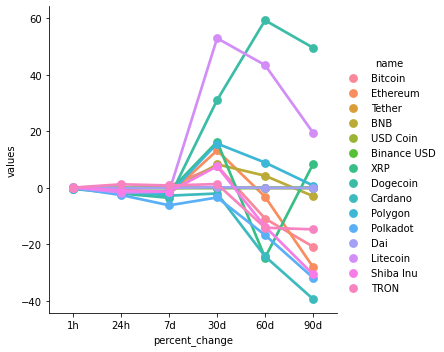

In [42]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

# But, the column names at percent_change is mess up. So, I change the column names of that values(go up to see the code)
# After that, we run it again

In [44]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want
# We just want to see the Bitcoin

df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,17152.32403,2022-12-09 22:00:33.657180
0,Bitcoin,17118.41096,2022-12-09 22:00:51.333759
0,Bitcoin,17118.30013,2022-12-09 22:01:52.590736
0,Bitcoin,17118.30013,2022-12-09 22:02:53.940145
0,Bitcoin,17118.50829,2022-12-09 22:03:55.244998
0,Bitcoin,17119.36901,2022-12-09 22:04:56.519405
0,Bitcoin,17120.14506,2022-12-09 22:05:57.847664
0,Bitcoin,17118.56105,2022-12-09 22:06:59.204008
0,Bitcoin,17119.77530,2022-12-09 22:08:00.540941
0,Bitcoin,17123.15139,2022-12-09 22:09:01.890557


C:\Users\ROG\anaconda3\lib\site-packages\seaborn\_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

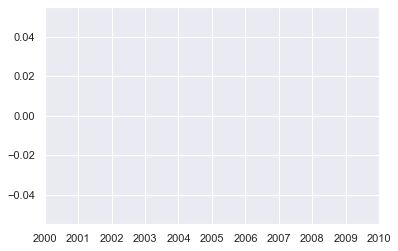

In [49]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp', y='quote.USD.price', data = df8)

# Oops, I got an Value error here..So, I'm trying to fix it